Q2-Which countries are making the biggest strides in decreasing CO2 output?

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:/Users/User/Downloads/owid-co2-data(2).csv")
df=pd.DataFrame(data)

In this analysis, "biggest strides" are measured using CO₂ per capita, as it reflects equity in emissions. Rather than focusing on absolute numbers, I examine the percentage decrease in per capita emissions over the past 10 years, which better highlights each country's progress.

In [2]:
# Get the latest and start years
latest_year = df['year'].max()
start_year = latest_year - 9

# Create a copy of the dataset and filter it to include only the last 10 years before any data manipulation
df_strides = df[(df['year'] >= start_year) & (df['year'] <= latest_year)].copy()

# Remove rows with missing country codes or CO2 per capita values
df_strides.dropna(subset=['iso_code', 'co2_per_capita'], inplace=True)

# Sort by year to get earliest and latest CO2 per capita
df_strides_sorted = df_strides.sort_values(by=['iso_code', 'year'])

# Get the CO2 per capita at the start and end of the period for each country
co2_start_end = df_strides_sorted.groupby('iso_code')['co2_per_capita'].agg(
    start_co2_per_capita='first',
    end_co2_per_capita='last'
).reset_index()

# Calculate percentage decrease
co2_start_end['percentage_decrease'] = ((
    co2_start_end['start_co2_per_capita'] - co2_start_end['end_co2_per_capita'])
    / co2_start_end['start_co2_per_capita']) * 100

# Filter for actual decreases and sort
top_decreasers = co2_start_end[co2_start_end['percentage_decrease']>0 ].sort_values(
    by='percentage_decrease', ascending=False
)

print(f"Top countries with the biggest strides in decreasing CO2 per capita (from {start_year} to {latest_year}):")
display(top_decreasers.head(10))

Top countries with the biggest strides in decreasing CO2 per capita (from 2015.0 to 2024.0):


,iso_code,start_co2_per_capita,end_co2_per_capita,percentage_decrease
47,CUW,44.002041,12.344206,71.946288
60,EST,12.003551,6.105464,49.136183
115,MAC,2.850239,1.466572,48.545639
209,YEM,0.453245,0.249441,44.965574
130,MSR,10.930322,6.021523,44.909924
2,AGO,0.976824,0.589497,39.651726
113,LUX,16.388624,10.459649,36.177382
140,NLD,9.584029,6.296910,34.297886
62,FIN,8.064647,5.300579,34.273884
154,PRT,5.036810,3.408907,32.320110


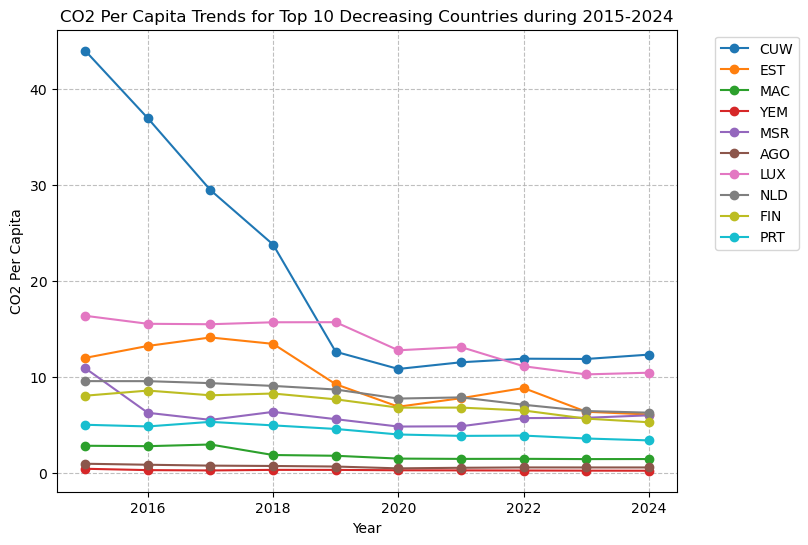

In [19]:
import matplotlib.pyplot as plt

# Get the ISO codes of the top 10 decreasers
top_10_iso_codes = top_decreasers['iso_code'].head(10)

# Filter the sorted strides data for these top 10 countries and Create a copy of the dataset
df_top_10_trends = df_strides_sorted[df_strides_sorted['iso_code'].isin(top_10_iso_codes)].copy()

# Create the plot
plt.figure(figsize=(8, 6))

#Plot CO2 per capita trends over time for the top 10 decreasing countries
for iso_code in top_10_iso_codes:
    country_data = df_top_10_trends[df_top_10_trends['iso_code'] == iso_code]
    plt.plot(country_data['year'], country_data['co2_per_capita'], marker='o', label=iso_code)

plt.title(f'CO2 Per Capita Trends for Top 10 Decreasing Countries during {int(start_year)}-{int(latest_year)}')
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()